In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters for GBM
S0 = 100  # Initial stock price
mu = 0.05  # Drift
sigma = 0.2  # Volatility
T = 1.0  # Time to maturity (in years)
dt = 0.01  # Time step
N = int(T / dt)  # Number of steps
n_simulations = 1000  # Number of simulations

# Simulate GBM paths
np.random.seed(42)
time = np.linspace(0, T, N)
paths = np.zeros((n_simulations, N))
paths[:, 0] = S0

for t in range(1, N):
    z = np.random.standard_normal(n_simulations)  # Random normal variables
    paths[:, t] = paths[:, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

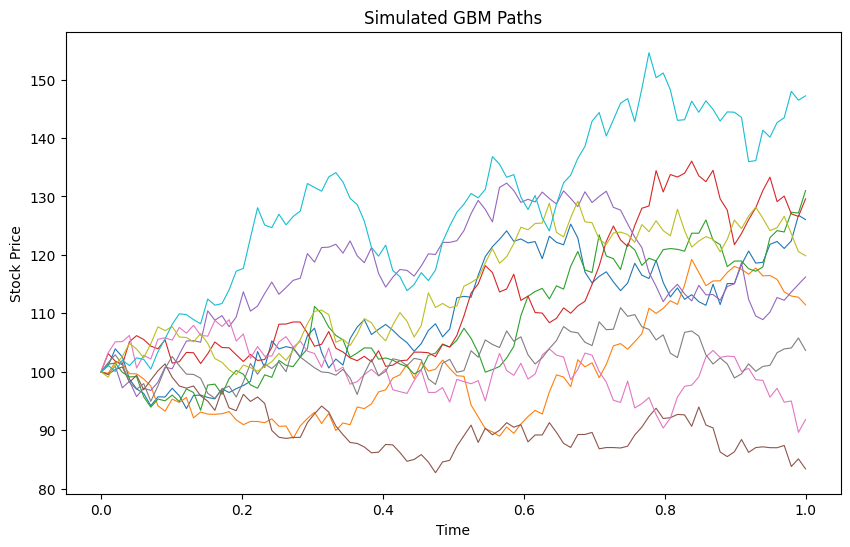

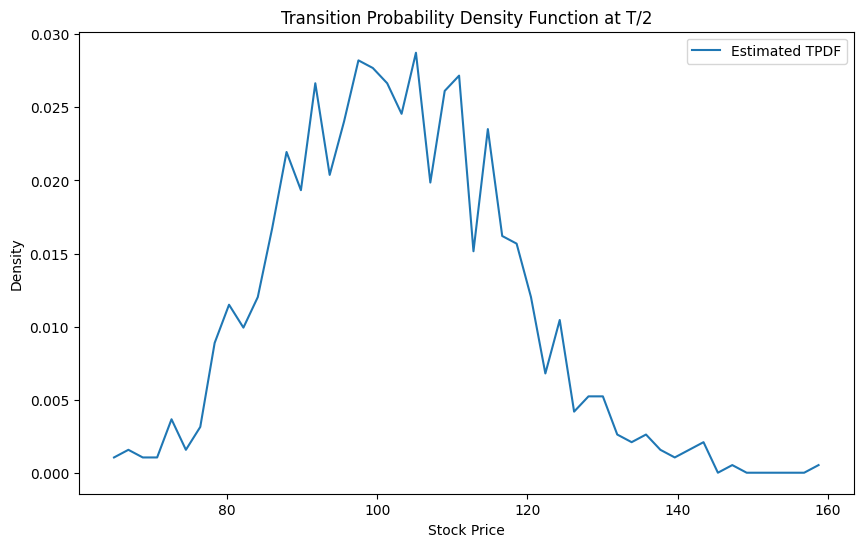

In [3]:
# Plot a few paths
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(time, paths[i], lw=0.8)
plt.title("Simulated GBM Paths")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

# Estimate TPDF at a specific time (e.g., T/2)
time_index = int(N / 2)
prices_at_t = paths[:, time_index]
pdf, bins = np.histogram(prices_at_t, bins=50, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot the TPDF
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pdf, label="Estimated TPDF")
plt.title("Transition Probability Density Function at T/2")
plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.legend()
plt.show()

In [4]:
# Parameters for option pricing
K = 105  # Strike price
r = 0.03  # Risk-free rate
n_simulations = 100000  # Number of simulations

# Simulate terminal stock prices
terminal_prices = paths[:, -1]

# Calculate option payoff
payoffs = np.maximum(terminal_prices - K, 0)

# Discount payoffs to present value
option_price = np.exp(-r * T) * np.mean(payoffs)

print(f"European Call Option Price: {option_price:.2f}")

European Call Option Price: 8.27


In [5]:
# Define a threshold
threshold = 90

# Estimate probability of stock price falling below the threshold at T
probability = np.mean(terminal_prices < threshold)

print(f"Probability of stock price falling below {threshold}: {probability:.4f}")

Probability of stock price falling below 90: 0.2440


Using Python Libraries for TPDF

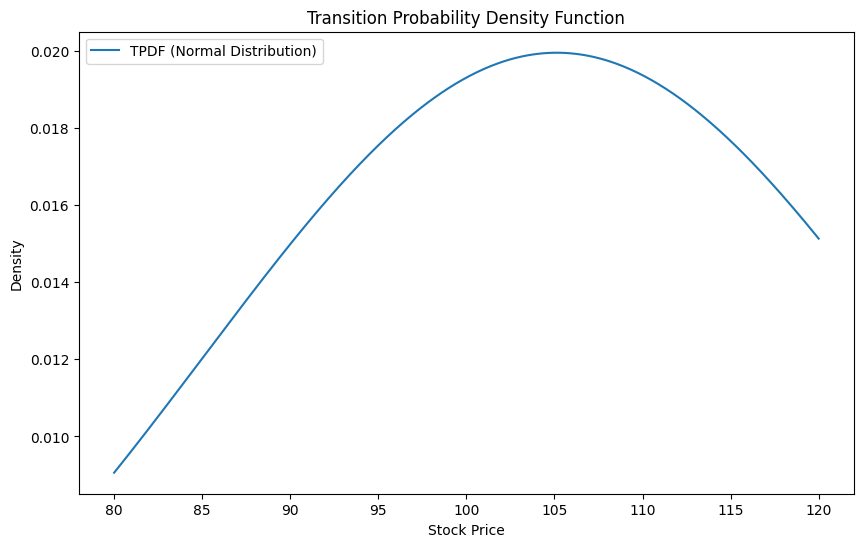

In [6]:
from scipy.stats import norm

# Parameters
x = np.linspace(80, 120, 500)  # Stock price range
mean = S0 * np.exp(mu * T)  # Expected value
std_dev = S0 * sigma * np.sqrt(T)  # Standard deviation

# Calculate TPDF
tpdf = norm.pdf(x, loc=mean, scale=std_dev)

# Plot TPDF
plt.figure(figsize=(10, 6))
plt.plot(x, tpdf, label="TPDF (Normal Distribution)")
plt.title("Transition Probability Density Function")
plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.legend()
plt.show()

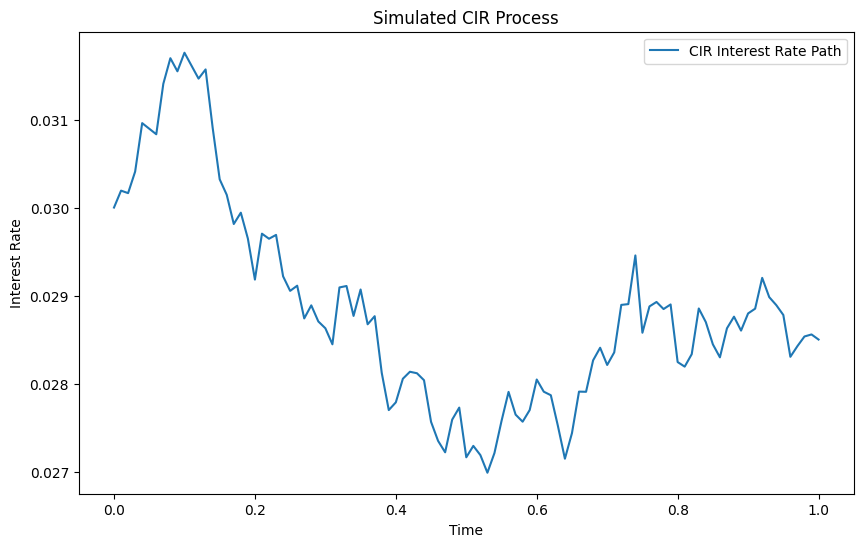

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# CIR model parameters
r0 = 0.03  # Initial interest rate
kappa = 0.1  # Mean reversion speed
theta = 0.05  # Long-term mean
sigma = 0.02  # Volatility
t = 1.0  # Time to maturity (in years)
n_steps = 100  # Number of time steps
dt = t / n_steps  # Time step size

# Time grid
times = np.linspace(0, t, n_steps + 1)

# Initialize the interest rate path
rates = np.zeros(n_steps + 1)
rates[0] = r0

# Simulate the CIR process
np.random.seed(42)  # For reproducibility
for i in range(1, n_steps + 1):
    z = np.random.normal(0, 1)  # Standard normal random variable
    dr = kappa * (theta - rates[i - 1]) * dt + sigma * np.sqrt(max(rates[i - 1], 0)) * np.sqrt(dt) * z
    rates[i] = rates[i - 1] + dr

# Plot the simulated path
plt.figure(figsize=(10, 6))
plt.plot(times, rates, label="CIR Interest Rate Path")
plt.title("Simulated CIR Process")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.legend()
plt.show()